In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.DataFrame(columns = [1,2])

In [7]:
def get_data(filename):
    # === Read column names ===
    myfile = open(filename, "r")
    columns = myfile.readline()[:-1].split(' ')
    # === Read the rows ===
    df = pd.read_csv(myfile, names = columns+["space"], header = 0, sep = ' ', index_col = None)
    df = df.drop(columns = ['space'])
    # === Rescale pn, and dn ===
    df["pn"]/=3.402820e+38
    df["dn"]/=3.402820e+38
    return df

In [8]:
#directory = "/home/doma945/repos/prooving-gobang/logs/"
directory = "/home/zombori/prooving-gobang/logs/"

files=[
    "disproof_4x5.csv",
    "disproof_4x6.csv",
    "disproof_4x7.csv",
    "disproof_4x8.csv",
    "disproof_4x9.csv",
    "disproof_4x10.csv",
    "disproof_4x11.csv",
    "proof_4x5.csv",
    "proof_4x6.csv",
    "proof_4x7.csv",
    "proof_4x8.csv",
    "proof_4x9.csv",
    "proof_4x10.csv",
    "proof_4x11.csv",
]

df_all = pd.DataFrame()
for filename in files:
    df_temp = get_data(directory+filename)
    df_all = pd.concat([df_all, df_temp])
df = df_all
df = df.astype({'pn': int, 'dn': int})
df = df.sample(frac=1).reset_index(drop=True)
print(len(df))
#df.head()

33027744


In [9]:
df.head()

,white,black,current_player,pn,dn,empty_cells,potential,node_count,l0,l1,l2,l3,l4,l5,l6,l7
0,1083441152,17591028453387,1,1,0,17,1.21875,21,0,0,2,3,5,1,0,0
1,8836895211521,824634245250,0,0,1,34,2.82812,2,0,0,3,10,12,0,2,6
2,35770089473,690047630302,1,1,0,13,1.12500,10,0,0,2,4,2,0,0,0
3,568344971840,496077116679,1,1,0,19,1.26562,2,0,0,1,7,2,0,1,0
4,4537715523584,11652666855595,1,1,0,17,1.10938,7,0,0,2,2,5,1,1,0


In [10]:
np.sum(df["pn"])/len(df)

0.8713667212631901

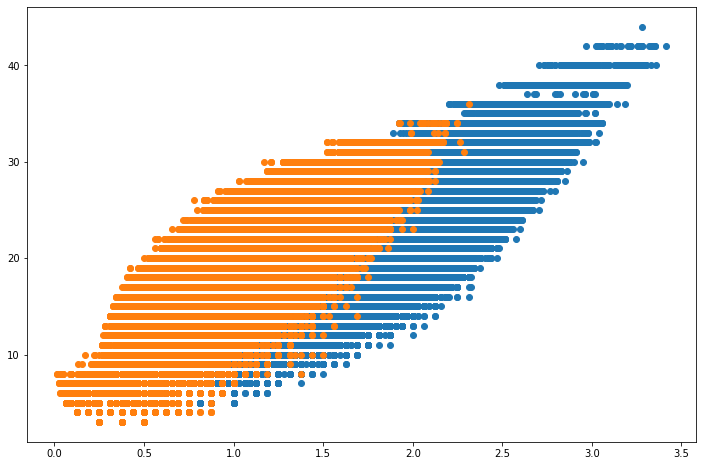

In [11]:
plt.figure(figsize=(12,8))
y_0 = df[np.logical_and(df["pn"]==0, df["current_player"]==0)]["empty_cells"]
x_0 = df[np.logical_and(df["pn"]==0, df["current_player"]==0)]["potential"]
y_1 = df[np.logical_and(df["pn"]==1, df["current_player"]==0)]["empty_cells"]
x_1 = df[np.logical_and(df["pn"]==1, df["current_player"]==0)]["potential"]

plt.scatter(x_0, y_0)
plt.scatter(x_1, y_1)

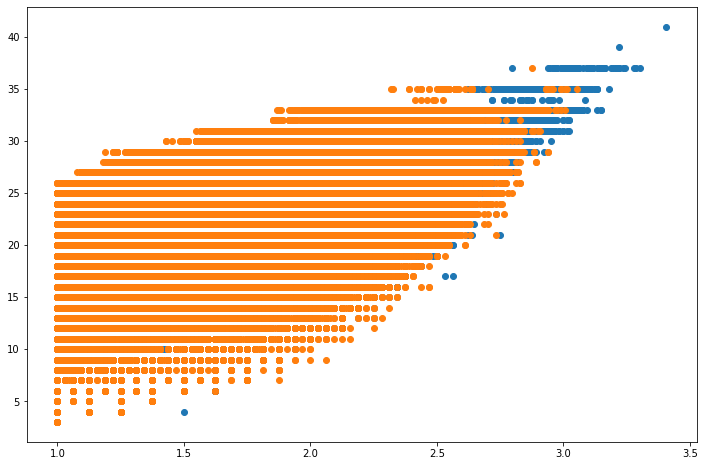

In [12]:
plt.figure(figsize=(12,8))
y_0 = df[np.logical_and(df["pn"]==0, df["current_player"]==1)]["empty_cells"]
x_0 = df[np.logical_and(df["pn"]==0, df["current_player"]==1)]["potential"]
y_1 = df[np.logical_and(df["pn"]==1, df["current_player"]==1)]["empty_cells"]
x_1 = df[np.logical_and(df["pn"]==1, df["current_player"]==1)]["potential"]

plt.scatter(x_0, y_0)
plt.scatter(x_1, y_1)

# Decision Tree for predicting the winner

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
mask = np.random.rand(len(df)) < 0.8
train = df[mask]
test = df[~mask]

#train = train[train["current_player"]==0]
#test = test[test["current_player"]==0]

print(len(train), len(test))

26424450 6603294


In [15]:
print(np.sum(train["dn"]==1)/len(train))

0.128594313221278


In [16]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree

In [17]:
clf = DecisionTreeClassifier(random_state=0)
inp_columns = ["current_player", "empty_cells", "l0", "l1", "l2", "l3", "l4", "l5", "l6", "l7", "potential"]
clf.fit(train[inp_columns], train["dn"])

#plt.figure(figsize=(20,10))
#tree.plot_tree(clf, feature_names=columns)
#plt.show()

DecisionTreeClassifier(random_state=0)

In [18]:
cross_val_score(clf, train[inp_columns], train["dn"])

array([0.98909154, 0.9891133 , 0.9892011 , 0.98911917, 0.98918218])

In [19]:
cross_val_score(clf, test[inp_columns], test["dn"])

array([0.98850952, 0.98872911, 0.98856556, 0.98859736, 0.98856706])

In [20]:
np.mean(clf.predict(df[inp_columns]))

0.12591056779415513

# Gradient Boosting Classifier

In [21]:
from sklearn.ensemble  import GradientBoostingClassifier

In [22]:
gbtree = GradientBoostingClassifier(random_state=1)

In [23]:
mask = np.random.rand(len(df)) < 0.01
small_train = df[mask]

In [24]:
gbtree.fit(small_train[inp_columns], small_train["dn"])

GradientBoostingClassifier(random_state=1)

In [25]:
gbtree.score(small_train[inp_columns], small_train["dn"])

0.988222535450867

In [26]:
cross_val_score(gbtree, small_train[inp_columns], small_train["dn"])

array([0.98760594, 0.98812236, 0.98809198, 0.98830445, 0.98774245])

In [27]:
cross_val_score(gbtree, test[inp_columns], test["dn"])

KeyboardInterrupt: 

# SVM

In [28]:
mask = np.random.rand(len(df)) < 0.001
small_train = df[mask]
mask = np.random.rand(len(df)) < 0.001
small_test = df[mask]

In [29]:
len(train), len(small_train), len(small_test)

(26424450, 32986, 33182)

In [30]:
from sklearn import svm

In [31]:
clf = svm.SVC(kernel='linear', C=1)
#clf = svm.SVC()
inp_columns = ["current_player", "empty_cells", "l0", "l1", "l2", "l3", "l4", "l5", "l6", "l7", "potential"]

In [32]:
clf.fit(small_train[inp_columns],small_train["dn"])

SVC(C=1, kernel='linear')

In [33]:
cross_val_score(clf, small_train[inp_columns], small_train["dn"])

array([0.98757199, 0.98544793, 0.98832803, 0.98605427, 0.9895407 ])

In [34]:
cross_val_score(clf, small_test[inp_columns], small_test["dn"])

array([0.98915173, 0.98749435, 0.98764316, 0.9889994 , 0.98719108])

In [35]:
clf.support_vectors_.shape

(1161, 11)

In [36]:
clf.support_

array([  158,   478,   480, ..., 32755, 32787, 32985], dtype=int32)

In [37]:
clf.n_support_

array([582, 579], dtype=int32)

# Regression

In [38]:
from sklearn.linear_model import LinearRegression, RANSACRegressor, LogisticRegression

In [39]:
reg = LogisticRegression(random_state=0, solver='liblinear', multi_class='ovr', class_weight="balanced")

In [40]:
reg.fit(train[inp_columns], train["dn"])

LogisticRegression(class_weight='balanced', multi_class='ovr', random_state=0,
                   solver='liblinear')

In [41]:
reg.score(train[inp_columns], train["dn"])

0.9781319573349682

In [42]:
reg.score(test[inp_columns], test["dn"])

0.9780713989109072

In [43]:
mask = (train["dn"] == 1)
i1 = train[inp_columns].loc[~mask]
w1 = train["dn"].loc[~mask]
reg.score(i1, w1)

0.9773534014151399

In [44]:
reg.coef_

array([[-11.97061895,  -0.74587011,   0.        ,   0.        ,
          3.89872472,   1.69855533,   0.83615186,   0.52004686,
          0.52770768,   0.57543724,   1.26825131]])

In [45]:
reg.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
cross_val_score(reg, train[inp_columns], train["dn"])